In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# LOAD DATASET

In [2]:
#upload 
df=pd.read_csv("Crop_Recommendation.csv")

# UNDERSTAND THE DATA

In [3]:
# First 5 data
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [4]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
#Description of data
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# PREPROCESS

In [6]:
#Checking null value
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [7]:
#Checking dulicate values
df.duplicated().sum()

0

In [8]:
#Unique values
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [9]:
df['Crop'].nunique()

22

# EDA

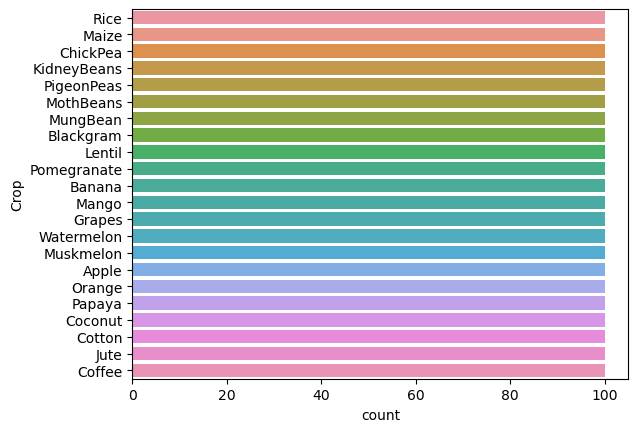

In [10]:
sns.countplot(y='Crop',data=df)
plt.show()

<Axes: >

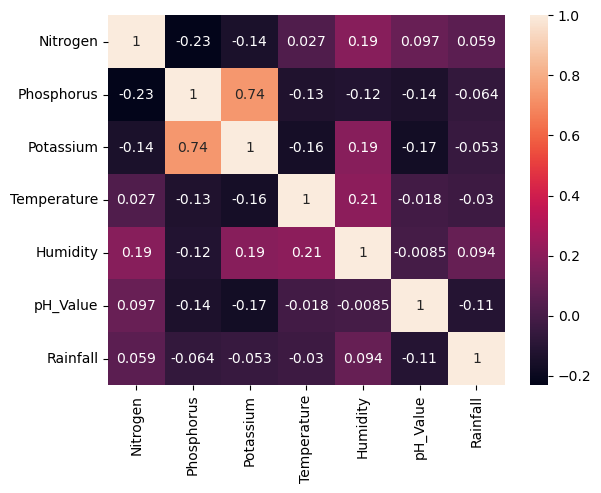

In [11]:
sns.heatmap(df.corr(),annot=True)

# X- y SPLIT

In [12]:
X=df.drop('Crop',axis=1)
y=df['Crop']

In [13]:
X

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [14]:
y

0         Rice
1         Rice
2         Rice
3         Rice
4         Rice
         ...  
2195    Coffee
2196    Coffee
2197    Coffee
2198    Coffee
2199    Coffee
Name: Crop, Length: 2200, dtype: object

# TRAIN -TEST SPLIT

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 
# Train-70% & Test-30%

In [16]:
X_train

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
1102,21,26,27,27.003155,47.675254,5.699587,95.851183
1159,29,35,28,28.347161,53.539031,6.967418,90.402604
141,60,44,23,24.794708,70.045567,5.722580,76.728601
1004,80,77,49,26.054330,79.396545,5.519088,113.229737
2,60,55,44,23.004459,82.320763,7.840207,263.964248
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [17]:
X_test

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
398,27,63,19,20.934099,21.189301,5.562202,133.191442
584,20,50,22,30.996947,46.426937,9.406888,38.315979
1702,45,47,55,38.419163,91.142204,6.751453,119.265388
292,39,76,76,19.968375,15.573244,8.135901,69.157591


# STANDARD SCALER

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [19]:
X_train=ss.fit_transform(X_train)
X_train

array([[-8.14149162e-01, -8.22608476e-01, -4.17586751e-01, ...,
        -1.10914730e+00, -1.00850068e+00, -1.14762954e-01],
       [-5.99794073e-01, -5.52511028e-01, -3.98018725e-01, ...,
        -8.39738838e-01,  6.40463882e-01, -2.12947619e-01],
       [ 2.30831896e-01, -2.82413580e-01, -4.95858854e-01, ...,
        -8.13537964e-02, -9.78595756e-01, -4.59356367e-01],
       ...,
       [-1.08209302e+00, -5.22500201e-01, -3.39314648e-01, ...,
        -9.20572349e-01,  6.00471872e-04, -3.53408620e-02],
       [-1.08209302e+00,  2.11845263e+00,  3.04595380e+00, ...,
         3.79045864e-01, -1.48070939e-01, -5.55371242e-01],
       [-5.19410914e-01,  7.37954558e-01, -5.15426879e-01, ...,
        -4.34666852e-01,  6.91994073e-01, -8.79579938e-01]])

In [20]:
X_test=ss.transform(X_test)
X_test

array([[ 1.32940173, -1.09270592, -0.02622624, ...,  1.05275226,
        -0.37709414, -1.36794363],
       [ 1.24901857, -1.36280337,  0.05204587, ...,  0.67567482,
        -0.28048064, -0.95127435],
       [ 0.20403751,  0.25778132,  0.01290981, ...,  0.98944543,
         0.60675059,  0.22630399],
       ...,
       [-0.1710839 , -0.1923811 ,  0.13031797, ...,  0.88792123,
         0.35957596,  0.30716649],
       [-0.33185021,  0.6779329 ,  0.54124651, ..., -2.58405905,
         2.16021479, -0.59578774],
       [ 1.3829905 , -1.12271675,  0.01290981, ...,  0.45138154,
         0.5732209 , -0.90943832]])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
rf=RandomForestClassifier()
svm=SVC()
log = LogisticRegression()
nb = GaussianNB()
gbc=GradientBoostingClassifier()
adabc=AdaBoostClassifier()

In [23]:
Algorithms=[knn,rf,svm,log,gbc,adabc]
Models=['KNN','Random Forest','Support Vector Machine','Logistic Regression','Gradient Boosting','Ada Boost']

In [24]:
for i, j in zip(Algorithms, Models):
    i.fit(X_train, y_train)  # Train the model
    y_train_pred = i.predict(X_train)  # Predict on training set
    y_test_pred = i.predict(X_test)  # Predict on test set

    train_score = metrics.accuracy_score(y_train, y_train_pred)
    test_score = metrics.accuracy_score(y_test, y_test_pred)

    print(j)
    print("=" * 40)
    print("Train Score:", train_score)  
    print("Test Score:", test_score)
    print() 

KNN
Train Score: 0.9876623376623377
Test Score: 0.9606060606060606

Random Forest
Train Score: 1.0
Test Score: 0.9924242424242424

Support Vector Machine
Train Score: 0.9883116883116884
Test Score: 0.9727272727272728

Logistic Regression
Train Score: 0.9772727272727273
Test Score: 0.9590909090909091

Gradient Boosting
Train Score: 1.0
Test Score: 0.9833333333333333

Ada Boost
Train Score: 0.2344155844155844
Test Score: 0.2106060606060606



# BASE MODEL

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
params={'n_estimators':[3,5,7,9],'criterion':['gini', 'entropy', 'log_loss'],'max_features':['sqrt', 'log2'],'oob_score':[True]}
gcv=GridSearchCV(rf,params,cv=5,scoring='accuracy')
gcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [3, 5, 7, 9], 'oob_score': [True]},
             scoring='accuracy')

In [27]:
gcv.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 9,
 'oob_score': True}

In [28]:
y_pred_gcv=gcv.predict(X_test)
metrics.accuracy_score(y_test,y_pred_gcv)

0.9878787878787879

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_gcv)

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36,  0,  0,

In [30]:
gcv.predict([[104,111,20,13.996,60.3975,6.7833,140.941]])

array(['Apple'], dtype=object)